# Building A Handwritten Digits Classifier

In this project explore the effectiveness of deep, feedforward neural networks at classifying images.

##  Work With Image Data

`Scikit-learn` contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the hand-written digits dataset from UCI ([link](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)).

Let's load dataset and visualize some digits.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

digits, labels = load_digits(return_X_y=True)
digits = pd.DataFrame(digits)
labels = pd.Series(labels)

fig = plt.figure()
images = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
for i,im in enumerate(images):
    ax = fig.add_subplot(2,4,i+1)
    image = digits.iloc[im].values.reshape(8,8)
    ax.imshow(image, cmap='gray_r')

## K-Nearest Neighbors Model

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import roc_auc_score
k_values = [2, 5, 10, 15]
accuracy_results = []
for k in k_values:
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    neigh = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(neigh, X=digits, y=labels, scoring='accuracy', cv=kf, return_train_score=True)
    accuracy_results.append(cv_results)

2 neighbours: test accuracy: 0.9805184360306854
2 neighbours: train accuracy: 0.9912814552175513
5 neighbours: test accuracy: 0.9832999257609502
5 neighbours: train accuracy: 0.9905390647201496
10 neighbours: test accuracy: 0.9782887899034892
10 neighbours: train accuracy: 0.9862725222992517
15 neighbours: test accuracy: 0.9749517446176689
15 neighbours: train accuracy: 0.9831190148896658


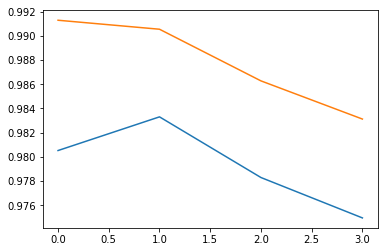

In [3]:
test_avgs = []
train_avgs = []
for i, k in enumerate(k_values):
    test_avg = np.average(accuracy_results[i]['test_score'])
    train_avg = np.average(accuracy_results[i]['train_score'])
    print(k, 'neighbours: test accuracy:', test_avg)
    print(k, 'neighbours: train accuracy:', train_avg)
    test_avgs.append(test_avg)
    train_avgs.append(train_avg)
plt.plot(test_avgs)
plt.plot(train_avgs)

## Neural Network With One Hidden Layer

Let's now try a neural network with a single hidden layer.

In [4]:
from sklearn.neural_network import MLPClassifier

neurons = [8, 16, 32, 64, 128, 256]
accuracy_results = []
for n in neurons:
    kf = KFold(n_splits=4, random_state=1, shuffle=True)
    nn = MLPClassifier(hidden_layer_sizes=(n,), activation='relu', max_iter=1400)
    cv_results = cross_validate(nn, X=digits, y=labels, scoring='accuracy', cv=kf, return_train_score=True)
    accuracy_results.append(cv_results)

8 neurons: test accuracy: 0.9376713684731501
8 neurons: train accuracy: 0.9998145400593472
16 neurons: test accuracy: 0.9610455332838406
16 neurons: train accuracy: 0.9998145400593472
32 neurons: test accuracy: 0.9671615936649345
32 neurons: train accuracy: 1.0
64 neurons: test accuracy: 0.9693887651571392
64 neurons: train accuracy: 1.0
128 neurons: test accuracy: 0.9699492699826776
128 neurons: train accuracy: 1.0
256 neurons: test accuracy: 0.9738406335065578
256 neurons: train accuracy: 1.0


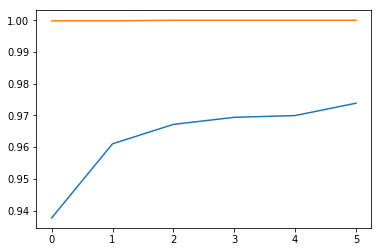

In [5]:
test_avgs = []
train_avgs = []
for i, n in enumerate(neurons):
    test_avg = np.average(accuracy_results[i]['test_score'])
    train_avg = np.average(accuracy_results[i]['train_score'])
    print(n, 'neurons: test accuracy:', test_avg)
    print(n, 'neurons: train accuracy:', train_avg)
    test_avgs.append(test_avg)
    train_avgs.append(train_avg)
plt.plot(test_avgs)
plt.plot(train_avgs)

## Neural Network With Two Hidden Layers

Adding more neurons to a single hidden layer vastly improved the classification accuracy. Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [6]:
# 2 hidden layers instead in the network
kf = KFold(n_splits=4, random_state=1, shuffle=True)
nn = MLPClassifier(hidden_layer_sizes=(64,64), activation='relu')
cv_results = cross_validate(nn, X=digits, y=labels, scoring='accuracy', cv=kf, return_train_score=True)
cv_results

{'fit_time': array([1.82093287, 1.74690676, 1.88156986, 1.77448082]),
 'score_time': array([0.00307298, 0.00389624, 0.00294209, 0.00307107]),
 'test_score': array([0.98      , 0.95545657, 0.98218263, 0.97327394]),
 'train_score': array([1., 1., 1., 1.])}

##  Neural Network With Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To prevent overfitting, let's increase the number of folds for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [7]:
# 6 fold cross validation
kf = KFold(n_splits=6, random_state=1, shuffle=True)
neurons = [10, 64, 128]
accuracy_results = []
for n in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='relu', max_iter=1000)
    cv_results = cross_validate(nn, X=digits, y=labels, scoring='accuracy', cv=kf, return_train_score=True)
    accuracy_results.append(cv_results)

10 neurons: test accuracy: 0.9449070977331848
10 neurons: train accuracy: 1.0
64 neurons: test accuracy: 0.9671646228167967
64 neurons: train accuracy: 1.0
128 neurons: test accuracy: 0.9783017465626161
128 neurons: train accuracy: 1.0


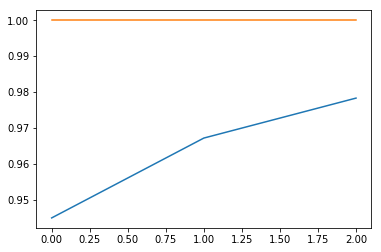

In [8]:
test_avgs = []
train_avgs = []
for i, n in enumerate(neurons):
    test_avg = np.average(accuracy_results[i]['test_score'])
    train_avg = np.average(accuracy_results[i]['train_score'])
    print(n, 'neurons: test accuracy:', test_avg)
    print(n, 'neurons: train accuracy:', train_avg)
    test_avgs.append(test_avg)
    train_avgs.append(train_avg)
plt.plot(test_avgs)
plt.plot(train_avgs)